<a name="top"> <h1>2.3. Logistic Regression</h1> <a>

<p>Payments Fraud Practice<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">Antonio Nogués Podadera (<em>antonio.nogues@cunef.edu</em>)</p>
<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>

<hr style="border:1px solid gray">

### Estructura

[0. Introducción](#introduccion) 


[1. Importación de librerias y funciones](#librerias) 


[2. Carga de datos](#datos) 

[3. Creación del modelo](#creacion) 

   
[4. Optimización del modelo](#optimizacion) 

   
[5. Predicción del modelo](#prediccion)

[6. Evaluación de las métricas del modelo](#metricas)

   - Matriz de confusión
   - Métricas: Accuracy, Recall, Precision, F1 y F2 score
   - Curva ROC

<hr style="border:1px solid gray">

# <a name="introduccion"> 0. Introducción <a> 

El **Modelo de Regresión Logística** es un algoritmo de clasificación que lo utilizamos para poder predecir la probabilidad de una variable dependiente categórica, en este caso la variable que queremos predecir es si se comete fraude o no.**Este algoritmo se basa principalmente en el cálculo de logaritmos para hallar el error**. 

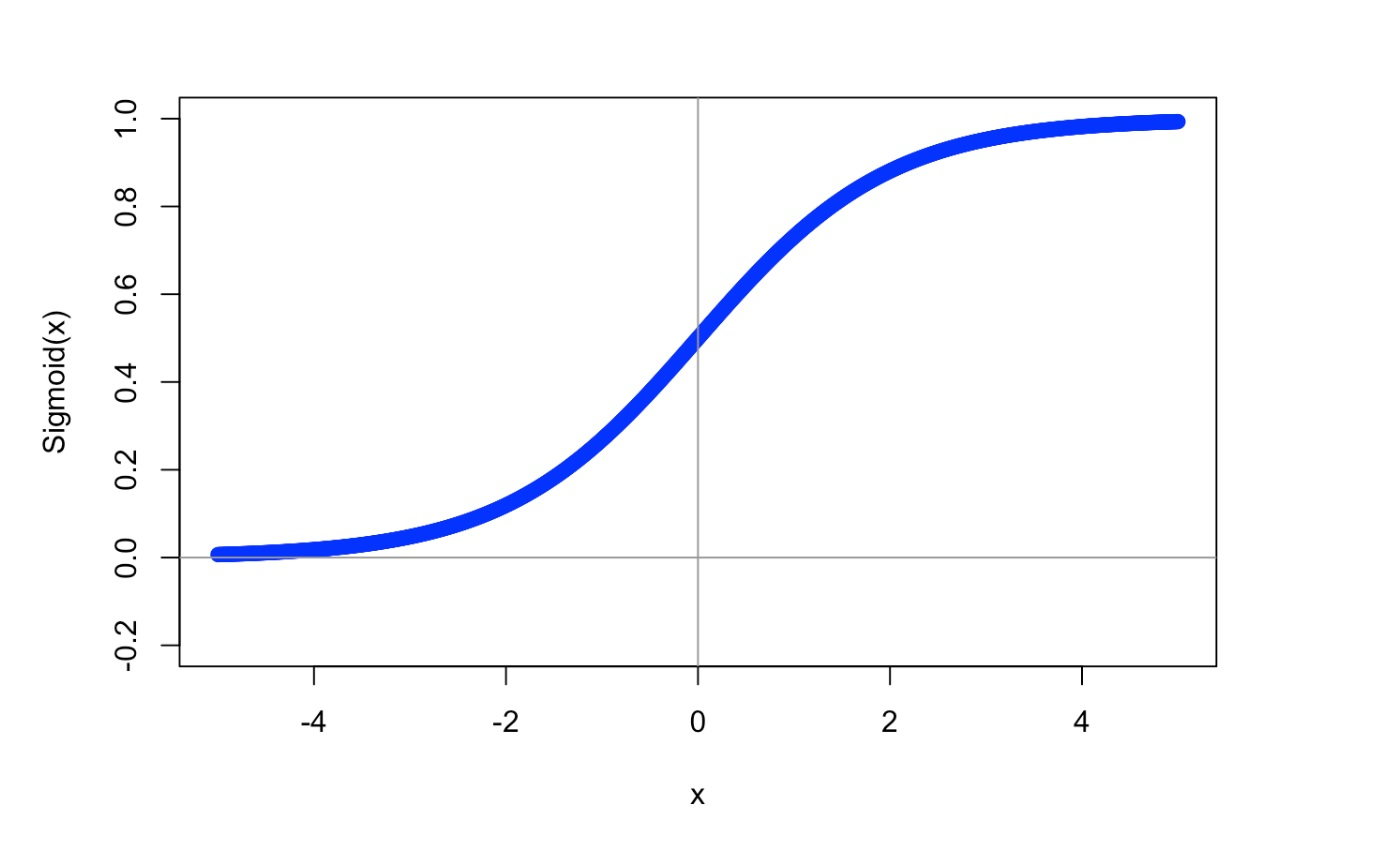

# <a name="librerias"> 1. Importación de librerias y funciones <a> 

In [13]:
# Import basic libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')


# Import sklearn metrics.

from sklearn.metrics import plot_confusion_matrix, fbeta_score, roc_curve, classification_report,accuracy_score,roc_auc_score

# Import sklearn models, smote and pipeline.

from sklearn.linear_model import Lasso, LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 

Importamos las funciones a utilizar:

In [2]:
# Import the functions used in the notebook.

from aux_functions import load_model, save_model

Cargamos el pickle de preprocesado, para su posterior uso:

In [3]:
# Import the preprocessor.

preprocessor = load_model('../models/preprocessor.pickle')

# <a name="datos"> 2. Carga de datos <a> 

En primer lugar procederemos a cargar los datos de train y validación que insertaremos dentro del modelo para su optimización y predicción.

In [4]:
# Load the train dataset separated by other variables and target. Taking into account that the first column is the index.

x_train = pd.read_csv("../data/processed/x_train.csv",index_col=0 )
y_train = pd.read_csv("../data/processed/y_train.csv",index_col=0 )

# Load the validation dataset separated by other variables and target. Taking into account that the first column is the index.

x_val = pd.read_csv("../data/processed/x_val.csv",index_col=0 )
y_val = pd.read_csv("../data/processed/y_val.csv",index_col=0 )

# <a name="creacion"> 3. Creación del modelo <a> 

Para la creación del modelo, **utilizaremos un modelo de regresión logística** con una función de penalización de tipo Lasso (L1), además utilizaremos la función liblinear dado que nuestra variable objetivo no tiene más de dos clases.

In [5]:
# Designate the hyperparameters.

n_jobs = -1 
random_state = 12345
solver= 'liblinear'
penalty = 'l1'


# Create a pipeline that applies a data preprocess and then the Logistic Regression.

logistic_regression = Pipeline([
    ('preprocessor', preprocessor),
    ('clasificador', LogisticRegression(random_state=random_state, n_jobs=n_jobs, penalty=penalty, solver=solver))
    
])

# <a name="optimizacion"> 4. Optimización del modelo <a> 

Optimizamos el modelo a través del pipeline creado anteriormente, para ello introduciremos los valores de train.

In [55]:
# Optimization of the Regression model with the train set: input and target data. 

logistic_regression.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknow',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type', 'gender', 'device',
                                                   'zone', 'security_alert',
                                                   'nameDest', 'nameOrig',
                                                   'nameDest']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
         

Una vez optimizado el modelo Logistic Regression, con el set de train, procedemos a guardarlo en un pickle para que no tenga que volver a computarlo en un futuro, por si quisieramos usarlo.

In [56]:
# Save the backup of the logistic_regression optimization as a pickle file.

save_model(logistic_regression,'../models/Logistic_Regression_Lasso.pickle')

**Para evitar optimizar de nuevo el modelo, ejecutar a partir de la celda que aparece a continuación.**

In [6]:
# Load the GLM model already fitted in /models.

logistic_regression = load_model('../models/Logistic_Regression_Lasso.pickle')

# <a name="prediccion"> 5. Predicción del modelo <a>  

Una vez realizada la optimización del modelo Logistic Regression, procederemos a predecir el set de validación, sus valores y probabilidades. Para posteriormente obtener las métricas y observar como se comporta el modelo y su score.

In [7]:
# Predict the target value of the validation set.

predictions = logistic_regression.predict(x_val)

# Predict the probabilities of the target value for validation set.

predict_probabilities = logistic_regression.predict_proba(x_val)

# <a name="metricas"> 6. Evaluación de las métricas del modelo <a> 

En este aparatado procederemos a análizar las métricas obtenidas. En el caso de que se quiera consultar la definición de cada una de ellas, se pueden encontrar en el documento `02_DummyModel`.

### 6.1. Matriz de confusión

Confusion matrix, without normalization
[[196382     12]
 [   128     86]]
Normalized confusion matrix
[[9.99938898e-01 6.11016630e-05]
 [5.98130841e-01 4.01869159e-01]]


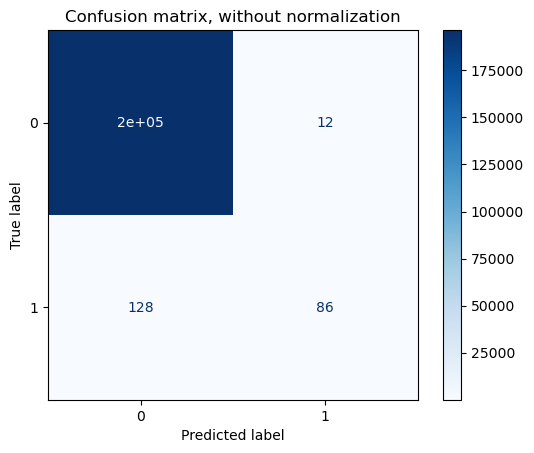

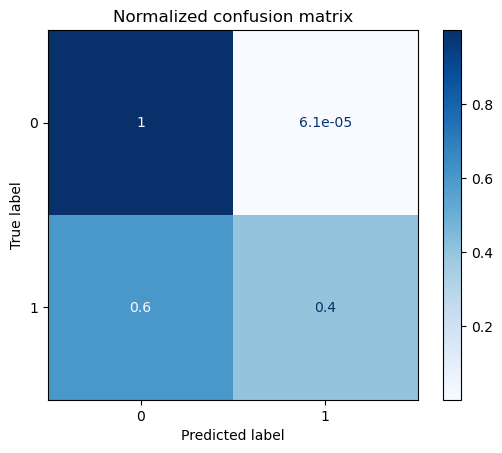

In [8]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_regression, x_val, y_val,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

La matriz de confusión nos permite observar que la clase 1 no consigue identificarla bien, **puesto que comete un fallo del 60%**. Podemos afirmar que **el modelo no se comporta correctamente a la hora de identificar un posible fráude** , aunque vamos a continuar  analizando las demás métricas.

### 6.2. Métricas: Accuracy, Recall, Precision, F1 score

In [60]:
# Print the general metrics.

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196394
           1       0.88      0.40      0.55       214

    accuracy                           1.00    196608
   macro avg       0.94      0.70      0.78    196608
weighted avg       1.00      1.00      1.00    196608



In [22]:
# Print the F2 score.

print('F2 score is ' +str(fbeta_score(y_val, predictions, average='binary', beta=2)))

# Model Accuracy

print("Accuracy:",accuracy_score(y_val, predictions))

F2 score is 0.45073375262054505
Accuracy: 0.9992879231770834


Como ya comentamos en el documento `02_DummyModel`, nuestro dataset se caracteriza por tener un desbalanceo muy grande, es por ello que el análisis de las métricas de accuracy y precisión siempre van a ser muy elevadas, sin embargo, no reflejan la realidad predictora de nuestro modelo. Por lo que nos centraremos principalmente en las métricas F2-score y AUC .

- El modelo nos calcula un **Recall de 0.70**, dado que el modelo no llega a detectar correctamente aquellas transacciones que son fraude o no.

- El modelo nos calcula un **F2 score de 0.45**, un valor mayor que en los modelos anteriores, sin embargo, no es lo suficientemente alto para considerar sus predicciones óptimas. 

### 6.3. Curva ROC

Para evaluar nuestro modelo, la representaremos graficamente para deducir que tan bueno es el modelo.

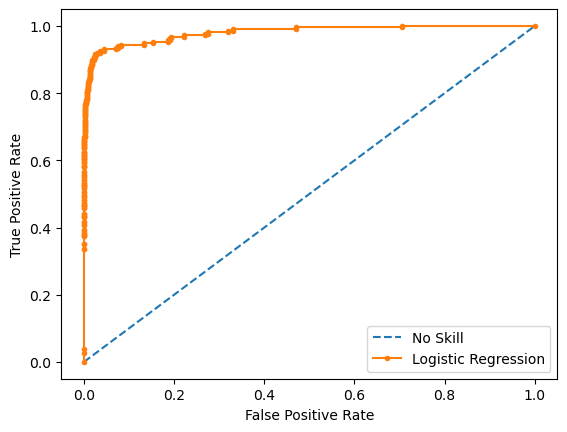

The Compute Area Under the Receiver Operating Characteristic is 0.9801658719802145


In [14]:
# keep probabilities for the positive outcome only
yhat = predict_probabilities[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# Display the ROC AUC.

print('The Compute Area Under the Receiver Operating Characteristic is '+ str(roc_auc_score(y_val,yhat)))

La curva ROC nos muestra un resultado muy bueno pero realmente atípico. Esto se debe a que los datos están desbalanceados, por lo que no utilizaremos esta métrica para basar la principal diferencia con los demás modelos.

[Ir arriba del documento](#top)